In [2]:
import pandas as pd
import re


In [40]:
def to_csv(model):
    # open text outputs extracted from "notebooks/capstone.ipynb" and copy/pasted in outputs/text
    with open("outputs/text/{}.txt".format(model), "r") as file:
        lines = file.readlines()

    data = []
    epoch = None #placeholder
    
    # Extract values
    for l in lines:
        epoch_match = re.search(r'Epoch (\d+)/\d+', l) # expected knowing format of .txt files in outputs/text
        if epoch_match: epoch = int(epoch_match.group(1)) # to get value X in "Epoch X / 150"

        # expecting format for the next stats...
        match = re.search(r'Fold (\d+) - Total Loss: ([\d.]+), Cross Entropy: ([\d.]+), Accuracy: ([\d.]+), Precision: ([\d.]+), Recall: ([\d.]+), F1 Score: ([\d.]+), AUC: ([\d.]+), R² Score: ([\-\d.]+), MAE: ([\d.]+), MSE: ([\d.]+)', l)
        if match and epoch != None: # we have found stats and we are inside an epoch
            fold, loss, ce, acc, prec, recall, f1, auc, r2, mae, mse = match.groups() # assign values to each col according to stats
            # add to data list
            data.append([epoch, int(fold), float(loss), float(ce), float(acc), float(prec), float(recall), float(f1), float(auc), float(r2), float(mae), float(mse)])
    
    # create a panda dataframe with the stats
    df = pd.DataFrame(data, columns=["Epoch", "Fold", "Loss", "CrossEntropy", "Accuracy", "Precision", "Recall", "F1Score", "AUC", "R2Score", "MAE", "MSE"])

    # Save to csv
    df.to_csv("outputs/csv/training_results_{}.csv".format(model), index=False)
    
    print("training_results_{}.csv created".format(model))


In [41]:

# names of models used also corresponding to their txt file: {model}.txt"
models = ["mobilenetv2", "resnet18", "densenet121", "vgg16", "vit-tiny", "efficientnet-b0", 
          "shufflenetv2-0_5x", "regnety-400mf", "mnasnet0_5", "convnext-tiny", "ghostnetv2", "tinynet-a"]

# make csv files from the output/text files of each model
for m in models:
    to_csv(m)


training_results_mobilenetv2.csv created
training_results_resnet18.csv created
training_results_densenet121.csv created
training_results_vgg16.csv created
training_results_vit-tiny.csv created
training_results_efficientnet-b0.csv created
training_results_shufflenetv2-0_5x.csv created
training_results_regnety-400mf.csv created
training_results_mnasnet0_5.csv created
training_results_convnext-tiny.csv created
training_results_ghostnetv2.csv created
training_results_tinynet-a.csv created


In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


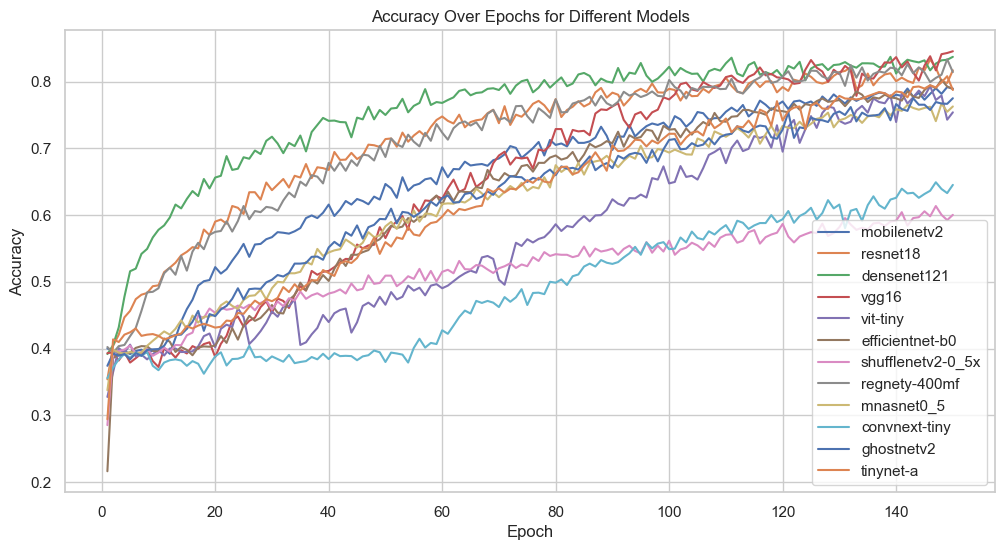

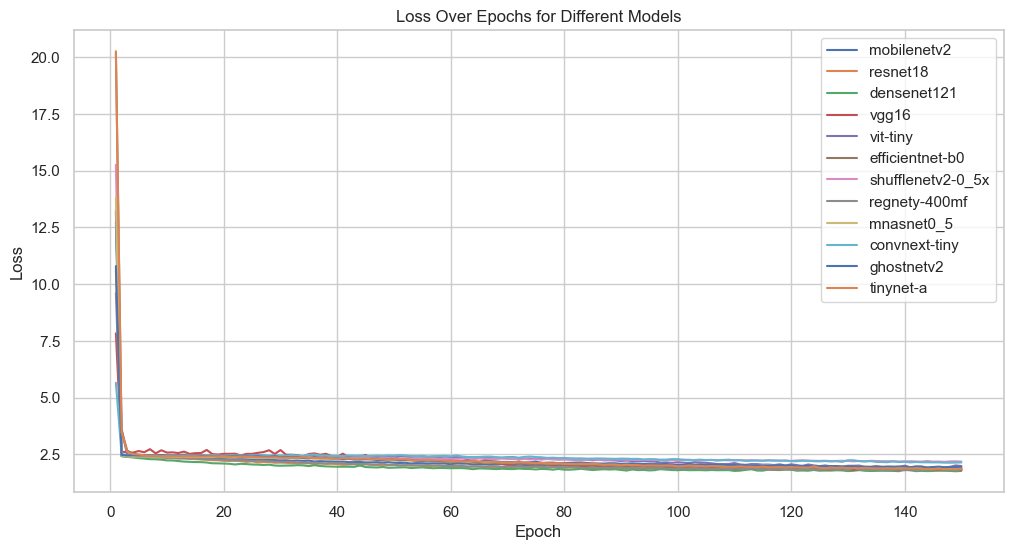

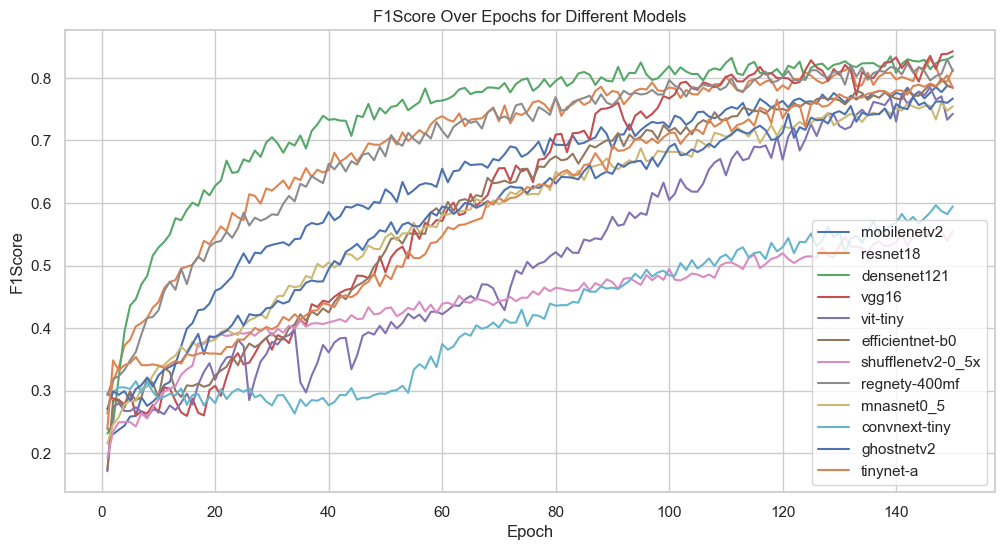

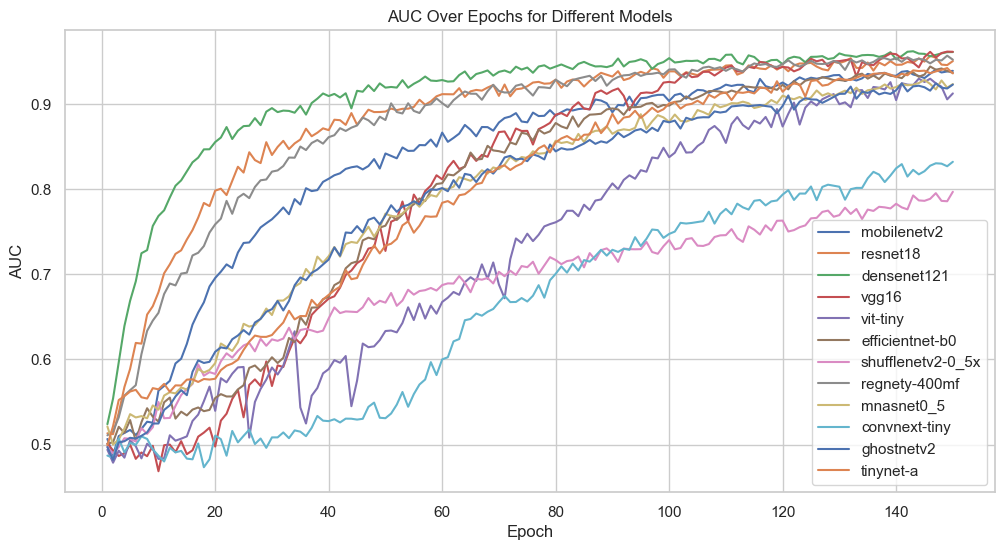

In [47]:

# List of models again
models = ["mobilenetv2", "resnet18", "densenet121", "vgg16", "vit-tiny", "efficientnet-b0", 
          "shufflenetv2-0_5x", "regnety-400mf", "mnasnet0_5", "convnext-tiny", "ghostnetv2", "tinynet-a"]

# to store all dfs from the csv files
dfs = []

# Load data from all CSVs
for model in models:
    # Load CSV in individual dataframe
    df = pd.read_csv(f"outputs/csv/training_results_{model}.csv")
    
    # Add the model name as a column 
    df["Model"] = model
    
    # Append to the list of dataframes for all models
    dfs.append(df)

# Concatenate all data into a single DataFrame
df_all = pd.concat(dfs, ignore_index=True)

# Set style for plots
sns.set(style="whitegrid")

# Metrics to plot
metrics = ["Accuracy", "Loss", "F1Score", "AUC"]

# Line plot for each metric
for metric in metrics:
    plt.figure(figsize=(12, 6))
    for model in models:
        # Subset for the specific model and group by 'Epoch' to calculate the mean
        subset = df_all[df_all["Model"] == model].groupby("Epoch")[metric].mean()
        
        # Plot the metric
        plt.plot(subset.index, subset.values, label=model,  linestyle='-')

    plt.xlabel("Epoch")
    plt.ylabel(metric)
    plt.title(f"{metric} Over Epochs for Different Models")
    plt.legend()
    plt.show()


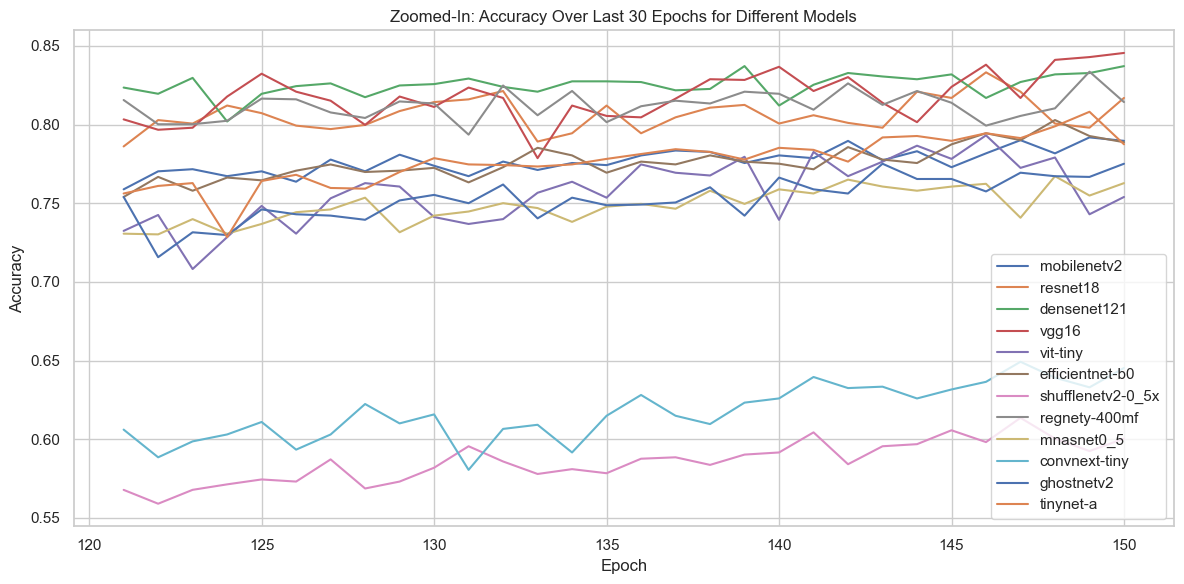

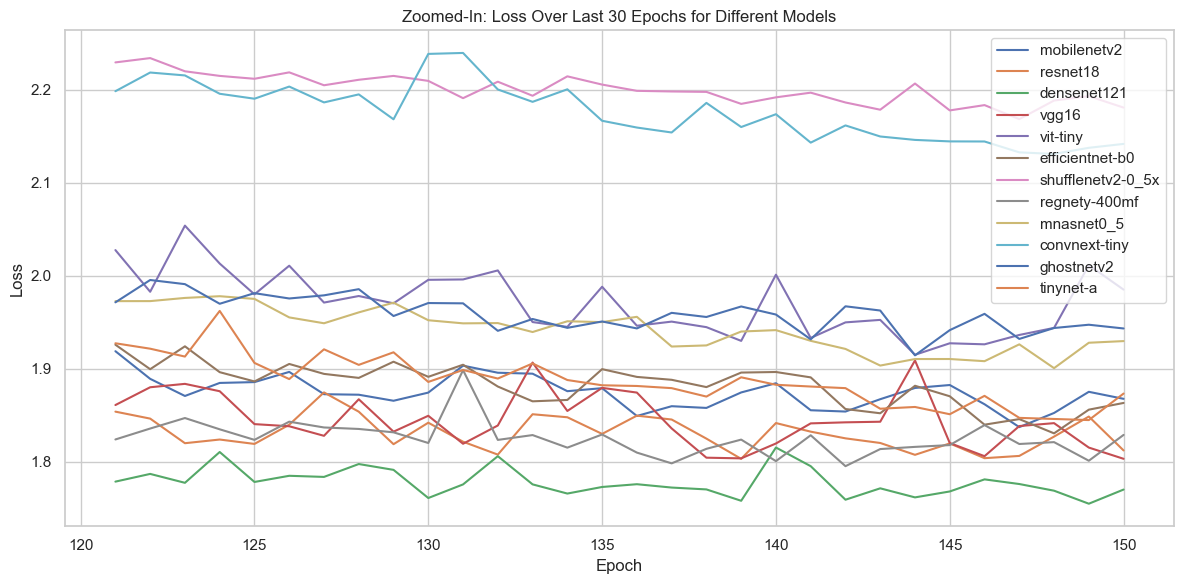

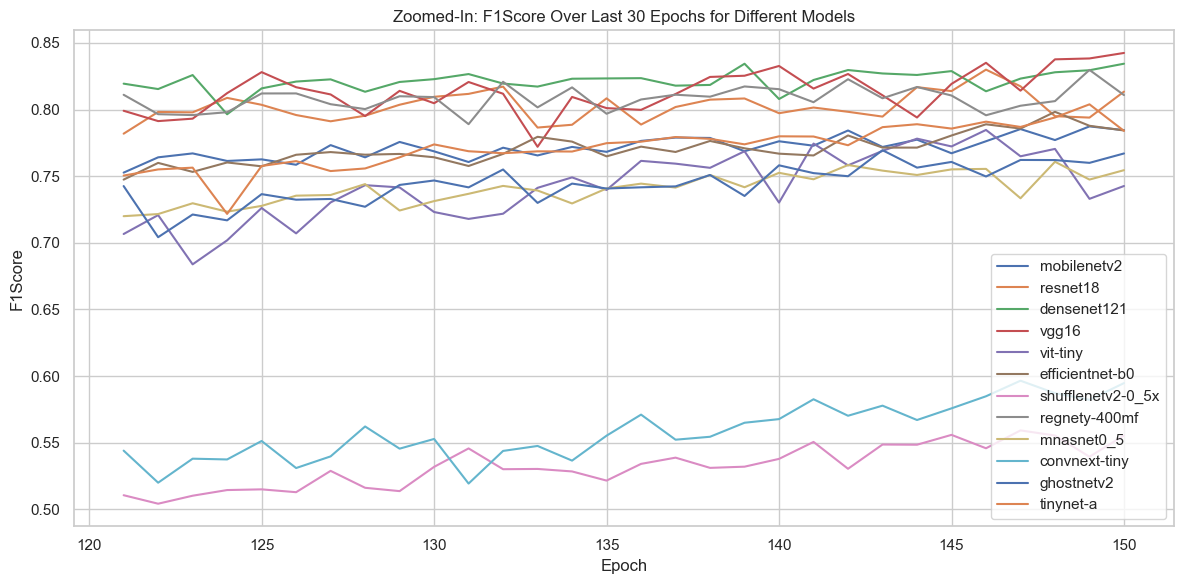

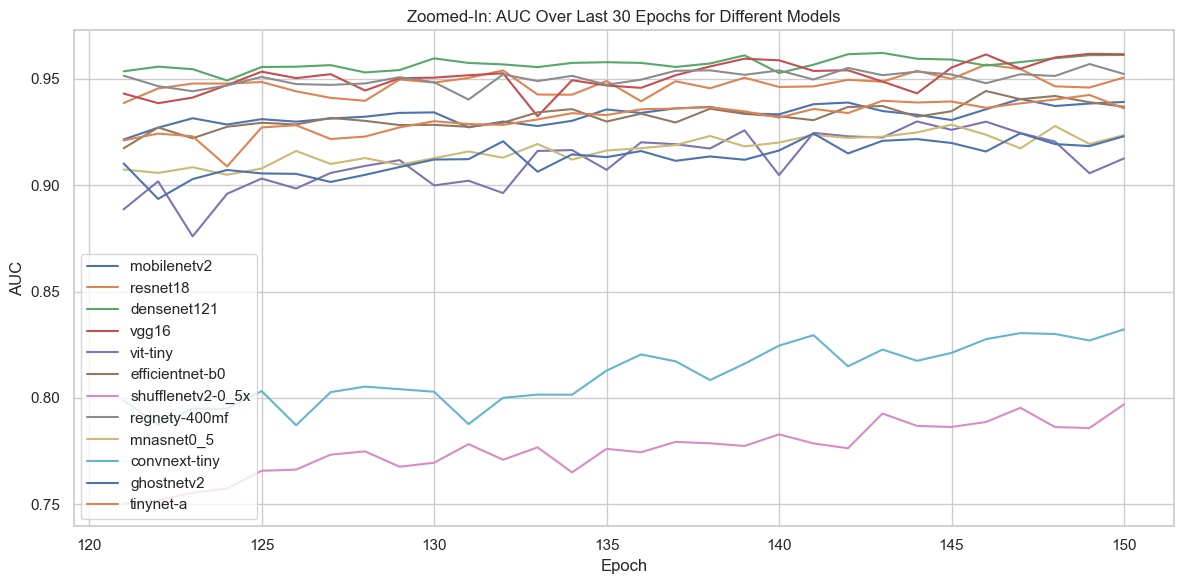

In [55]:
# epochs to zoom in on
zoom_epochs = 30
max_epoch = 150

# Subset all models data for the close-up data from max_epochs - zoom_epochs to max_epochs
df_zoom = df_all[df_all["Epoch"] > (max_epoch - zoom_epochs)]

# Metrics to plot
metrics = ["Accuracy", "Loss", "F1Score", "AUC"]

# Line plot for each metric
for metric in metrics:
    plt.figure(figsize=(12, 6))
    
    for model in models:
        subset = df_zoom[df_zoom["Model"] == model].groupby("Epoch")[metric].mean()
        plt.plot(subset.index, subset.values, label=model, linestyle='-')

    plt.xlabel("Epoch")
    plt.ylabel(f"{metric}")
    plt.title(f"Zoomed-In: {metric} Over Last {zoom_epochs} Epochs for Different Models")
    plt.legend()
    plt.tight_layout()
    plt.show()


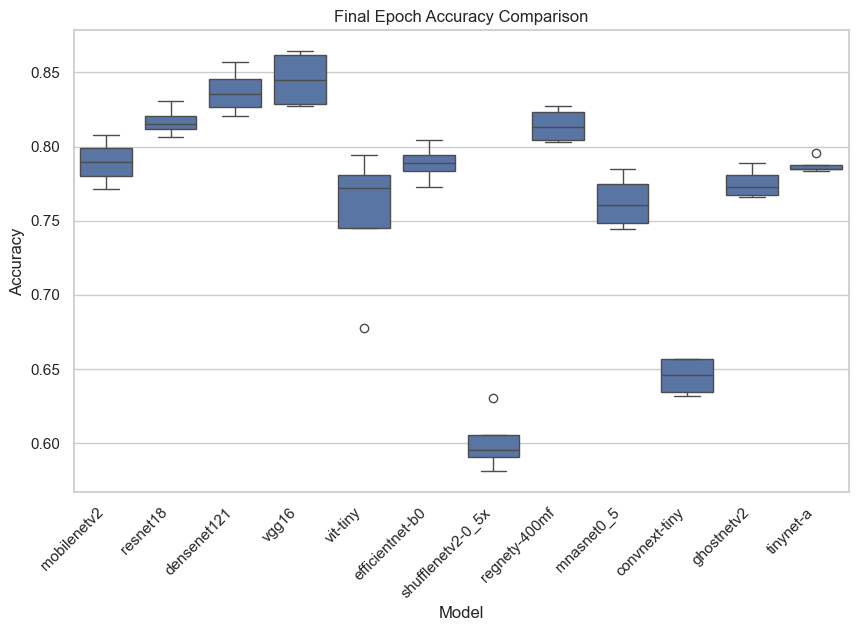

In [54]:
final_epoch = 150

plt.figure(figsize=(10, 6))

sns.boxplot(x="Model", y="Accuracy", data=df_all[df_all["Epoch"] == final_epoch])

plt.xticks(rotation=45, ha='right')
plt.title(f"Final Epoch Accuracy Comparison")
plt.show()
